**Machine Learning - Unit 2 - EDA Tutorial**

Undertake EDA with Auto-mpg dataset:

*  Identify missing values.
*  Estimate Skewness and Kurtosis.
*  Correlation Heat Map.
*  Scatter plot for different parameters.
*  Replace categorical values with numerical values (i.e., America 1, Europe 2 etc.).

**1. Step: Download the data set from kaggle**

In [ ]:
!pip install mlcroissant
!pip install numpy
!pip install pandas
!pip install kaggle  # to access Kaggle datasets
!pip install seaborn
!pip install matplotlib

import mlcroissant as mlc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.5/136.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 562.4/562.4 kB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.2 MB/s eta 0:00:00
  Created wheel for jsonpath-rw: filename=jsonpath_rw-1.4.0-py3-none-any.whl size=15130 sha256=0d4ea4d76eb413b782d2d156fedf73beb398b597597e9d133fc0251ea8e630d5
  Stored in directory: /root/.cache/pip/wheels/e3/76/6f/c25be6a9e6cc9985b96e8c95997d46790242c6426ef68e754c
Successfully built jsonpath-rw


In [ ]:
# Download the dataset from Kaggle
!kaggle datasets download -d uciml/autompg-dataset --unzip

# Load CSV directly into a DataFrame
file_path = "auto-mpg.csv"  # Use the actual CSV file name in the downloaded dataset
record_set_df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(record_set_df)

Dataset URL: https://www.kaggle.com/datasets/uciml/autompg-dataset
License(s): CC0-1.0
  0% 0.00/6.31k [00:00<?, ?B/s]
100% 6.31k/6.31k [00:00<00:00, 16.9MB/s]
      mpg  cylinders  displacement horsepower  weight  acceleration  \
0    18.0          8         307.0        130    3504          12.0   
1    15.0          8         350.0        165    3693          11.5   
2    18.0          8         318.0        150    3436          11.0   
3    16.0          8         304.0        150    3433          12.0   
4    17.0          8         302.0        140    3449          10.5   
..    ...        ...           ...        ...     ...           ...   
393  27.0          4         140.0         86    2790          15.6   
394  44.0          4          97.0         52    2130          24.6   
395  32.0          4         135.0         84    2295          11.6   
396  28.0          4         120.0         79    2625          18.6   
397  31.0          4         119.0         82    2720      

**2. Step: Identify missing values**

In [ ]:
# Search for missing values:
na_counts = record_set_df.isna().sum()
print(na_counts)

# There is a string "?" which is in fact a missing value. I search for it:
search_string = '?'
# Count occurrences per column
count_per_column = record_set_df.apply(lambda col: (col == search_string).sum())
print(count_per_column)

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


As we see, there are no missing values in the data set.

However, there are 6 rows within the horsepower column that hold the value "?" which is in fact a missing value. I need to change them to NA values and then get rid of them. As it is only 6 values I decide to get rid of the complete rows because it is only a small proportion of the data set (compared to 398 total rows).

In [ ]:
# Change "?" strings to NA values:
df = record_set_df.replace("?", np.nan)

# Get rid of all rows that hold NA values:
df_cleaned = df.dropna()

print(df_cleaned)

      mpg  cylinders  displacement horsepower  weight  acceleration  \
0    18.0          8         307.0        130    3504          12.0   
1    15.0          8         350.0        165    3693          11.5   
2    18.0          8         318.0        150    3436          11.0   
3    16.0          8         304.0        150    3433          12.0   
4    17.0          8         302.0        140    3449          10.5   
..    ...        ...           ...        ...     ...           ...   
393  27.0          4         140.0         86    2790          15.6   
394  44.0          4          97.0         52    2130          24.6   
395  32.0          4         135.0         84    2295          11.6   
396  28.0          4         120.0         79    2625          18.6   
397  31.0          4         119.0         82    2720          19.4   

     model year  origin                   car name  
0            70       1  chevrolet chevelle malibu  
1            70       1          buick sk

**3. Step: Estimate Skewness and Kurtosis**

In [ ]:
# The string "?" is present in the data somewhere. As this is not numeric, it needs to be changed to NA and then I need to consider how to deal with this missing value(s)

# We need to exclude the car name column from the following analysis because it is no numerical variable
selected_columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']

# Calculate skewness
data_skewness = df_cleaned[selected_columns].skew()
print("Skewness:", data_skewness)

# Calculate kurtosis
data_kurtosis = df_cleaned[selected_columns].kurt()
print("Kurtosis:", data_kurtosis)

Skewness: mpg             0.457092
cylinders       0.508109
displacement    0.701669
horsepower      1.087326
weight          0.519586
acceleration    0.291587
model year      0.019688
origin          0.915185
dtype: object
Kurtosis: mpg            -0.515993
cylinders      -1.398199
displacement   -0.778317
horsepower      0.696947
weight         -0.809259
acceleration    0.444234
model year     -1.167446
origin         -0.841885
dtype: object


**Interpretation of Skewness**
* Positive: right-skewed; Negative: left-skewed
* -0.5 to +0.5: Approximately symmetric.
* -1 to -0.5 or 0.5 to 1: Moderately skewed.
* Less than -1 or greater than +1: Highly skewed

**Interpretation of Kurtosis:**
* Higher kurtosis (>3) indicates heavy tails, meaning there are more outliers or extreme values in the data.
* Lower kurtosis (<3) suggests light tails, meaning fewer outliers than a normal distribution.
* Kurtosis = 3 means a normal-like distribution considering the amount of outliers


**4. Step: Creation of a Correlation Heat Map**

                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
model year    0.580541  -0.345647     -0.369855   -0.416361 -0.309120   
origin        0.565209  -0.568932     -0.614535   -0.455171 -0.585005   

              acceleration  model year    origin  
mpg               0.423329    0.580541  0.565209  
cylinders        -0.504683   -0.345647 -0.568932  
displacement     -0.543800   -0.369855 -0.614535  
horsepower       -0.689196   -0.416361 -0.455171  
weight           -0.416839   -0.309120 -0.585005  
acceleration      1.000000    0.2903

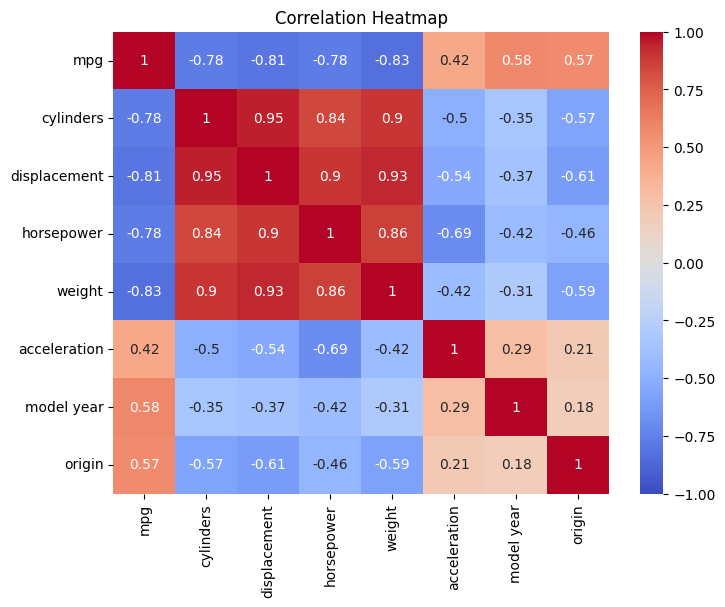

In [ ]:
# Calculate Correlation Matrix
correlation_matrix = df_cleaned[selected_columns].corr()
print(correlation_matrix)

# Plot the Heatmap
plt.figure(figsize=(8, 6)) # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

**5. Step: Scatter plot for different parameters**

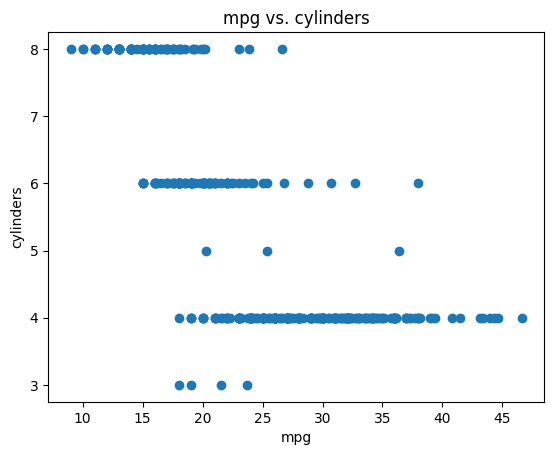

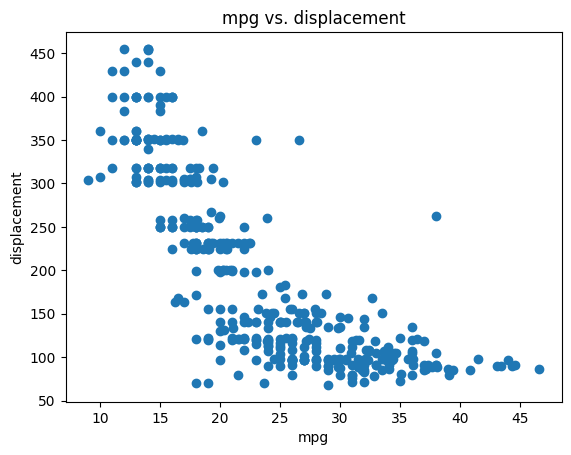

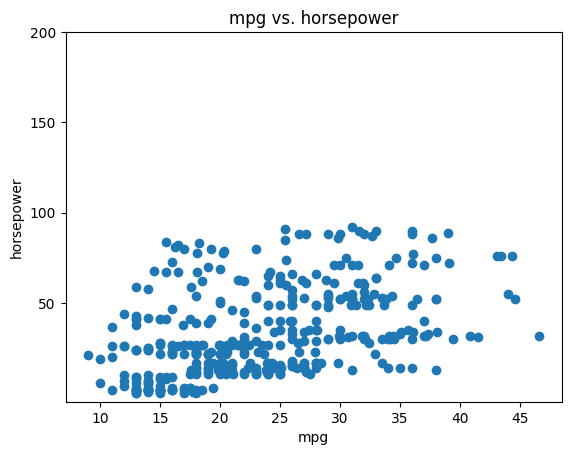

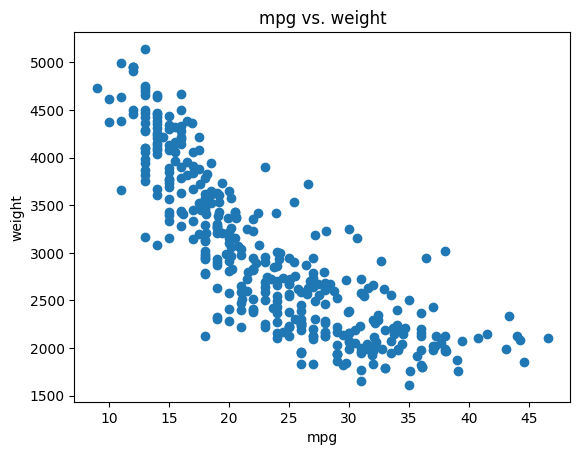

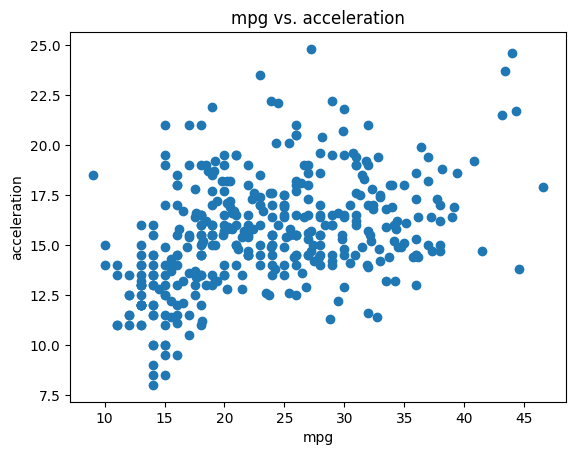

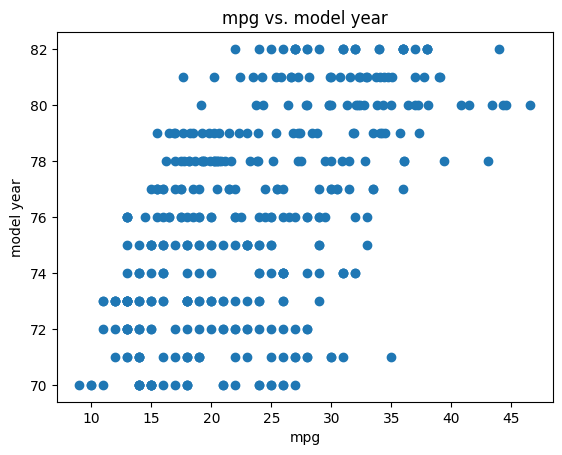

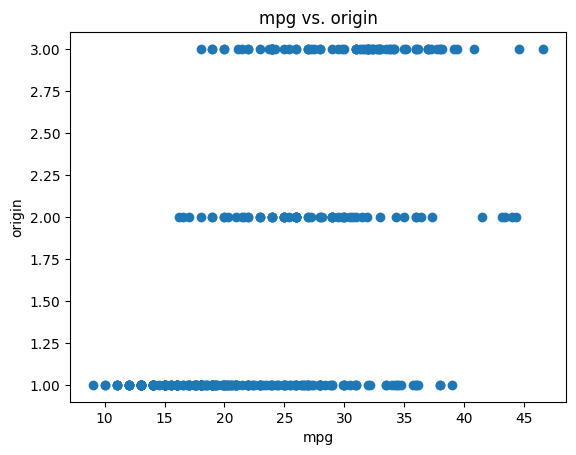

In [ ]:
# Scatter plot for mpg with all other parameters to look at the correlations

# mpg vs. cylinders:
plt.scatter(df_cleaned['mpg'], df_cleaned['cylinders'])
plt.xlabel('mpg')
plt.ylabel('cylinders')
plt.title('mpg vs. cylinders')
plt.show()

# mpg vs. displacement:
plt.scatter(df_cleaned['mpg'], df_cleaned['displacement'])
plt.xlabel('mpg')
plt.ylabel('displacement')
plt.title('mpg vs. displacement')
plt.show()

# mpg vs. horsepower:
plt.scatter(df_cleaned['mpg'], df_cleaned['horsepower'])
plt.xlabel('mpg')
plt.ylabel('horsepower')
plt.title('mpg vs. horsepower')
plt.yticks([50, 100, 150, 200], labels = ['50', '100', '150', '200'])
plt.show() # TO BE RE-CHECKED!! (SHOULD SHOW MAXIMUM LEVEL OF 225 HORSEPOWER!!!)

# mpg vs. weight:
plt.scatter(df_cleaned['mpg'], df_cleaned['weight'])
plt.xlabel('mpg')
plt.ylabel('weight')
plt.title('mpg vs. weight')
plt.show()

# mpg vs. acceleration:
plt.scatter(df_cleaned['mpg'], df_cleaned['acceleration'])
plt.xlabel('mpg')
plt.ylabel('acceleration')
plt.title('mpg vs. acceleration')
plt.show()

# mpg vs. model year:
plt.scatter(df_cleaned['mpg'], df_cleaned['model year'])
plt.xlabel('mpg')
plt.ylabel('model year')
plt.title('mpg vs. model year')
plt.show()

# mpg vs. origin:
plt.scatter(df_cleaned['mpg'], df_cleaned['origin'])
plt.xlabel('mpg')
plt.ylabel('origin')
plt.title('mpg vs. origin')
plt.show()

**6. Step: Change origin variable from numeric to categorical variable type**

In [ ]:
# Print unique values in the 'Region' column
unique_values = df_cleaned['origin'].unique()
print(unique_values)

# The unique values are 1, 2 and 3.

# 1 stands for America, 2 stands for Europe

# What does 3 stand for?

# Filter data set for origin = 3:
filtered_data = df_cleaned[df_cleaned['origin'] == 3]
print(filtered_data)
# As the cars shown under the "car name" column are all Asian, we see that the value 3 in the column "origin" stand for Asia

# Using the mapping feature in Python enables us to change from this numerical presentation to a categorical presentation and vice versa.

[1 3 2]
      mpg  cylinders  displacement horsepower  weight  acceleration  \
14   24.0          4         113.0         95    2372          15.0   
18   27.0          4          97.0         88    2130          14.5   
29   27.0          4          97.0         88    2130          14.5   
31   25.0          4         113.0         95    2228          14.0   
53   31.0          4          71.0         65    1773          19.0   
..    ...        ...           ...        ...     ...           ...   
382  34.0          4         108.0         70    2245          16.9   
383  38.0          4          91.0         67    1965          15.0   
384  32.0          4          91.0         67    1965          15.7   
385  38.0          4          91.0         67    1995          16.2   
390  32.0          4         144.0         96    2665          13.9   

     model year  origin               car name  
14           70       3  toyota corona mark ii  
18           70       3           datsun 